In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
#GridSearchCV
#RandomisedSearchCV

In [15]:
ad = pd.read_csv('/home/gbhure/Data/Social_Network_Ads.csv')
ad.Gender = ad.Gender.map({'Male': 1, 'Female': 0})
X = ad.iloc[:, 1:4].values
y = ad.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [16]:
ad.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
rf = RandomForestClassifier(n_estimators=200, random_state=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.875

In [23]:
rf1 = RandomForestClassifier(n_estimators=200, random_state=2)

In [52]:
params = { 'max_depth': [2,3,5,10,None],
           'n_estimators': [10,100,200,300,400,500],
           'criterion': ['gini', 'entropy'],
           'bootstrap': [True, False] }
rdm_search = RandomizedSearchCV(rf1, param_distributions=params,n_jobs=-1, n_iter=40)

In [53]:
rdm_search.fit(X, y)

/home/gbhure/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=3,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=200,
                                                    n_jobs=N

In [54]:
rdm_search.best_params_

{'n_estimators': 100,
 'max_depth': 3,
 'criterion': 'entropy',
 'bootstrap': False}

In [55]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=3, criterion='entropy', bootstrap=False, random_state=2)

In [56]:
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.9375

In [58]:
# home work.. Explore for GridSearchCV. Also with different datasets and different algo like SVM, RF

In [59]:
# Service -- basic service, silver, gold, platinum

In [ ]:
# Clustering -- Unsupervised machine learning
# k-means clustering

- Take any k (k=2) data points from dataset -- randomly
- Find all mearest neighbors from these points
- Find mean of those nearest points
- repeat till we get the same mean again and again

In [61]:
a = np.array([2,3,4,10,11,12,20,25,30])
a

array([ 2,  3,  4, 10, 11, 12, 20, 25, 30])

In [66]:
np.mean([2,3,4,10,11,12])

7.0

In [ ]:
k=2
random -- 4 and 12

k1 = {2,3,4}
k2 = {10,11,12,20,25,30}

centroid -- mean
c1 = 3, c2 = 18

nearest values for c1 and c2
k3 = {2,3,4,10}
k4 = {11, 12, 20, 25, 30}

c3 = 4.75
c4 = 19.6

k5 = {2,3,4,10,11,12}
k6 = {20, 25, 30}

c5 = 7
c6 = 25

k7 = {2,3,4,10,11,12}
k8 = {20, 25, 30}

In [26]:
# k-means clustering
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

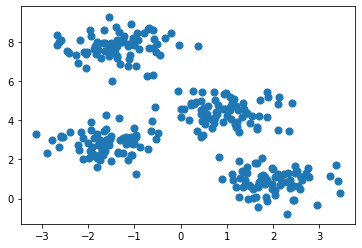

In [27]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

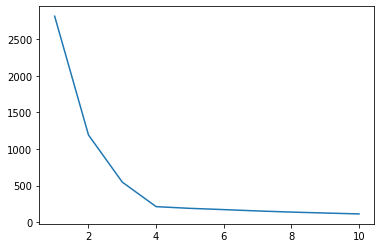

In [32]:
# Elbow method
w = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    w.append(km.inertia_)
plt.plot(range(1,11), w)

In [109]:
X[:2]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324]])

In [104]:
km = KMeans(n_clusters=4)
km.fit(X)
y_pred = km.predict(X) # cluster numbers assigned to each data point... 0 to 3

In [105]:
X

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

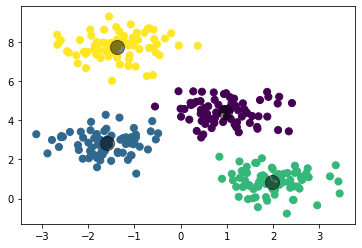

In [77]:
# implementation of k-means
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    # randomly choose clusers
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        #assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        #find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

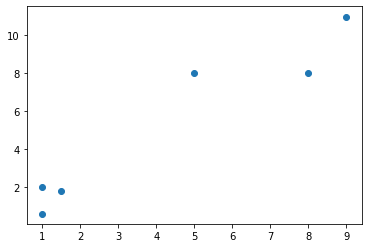

In [81]:
X = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]
plt.scatter(X, y)

In [82]:
X = np.array([[1,2], [5,8], [1.5,1.8], [8,8], [1,0.6], [9,11]])

In [84]:
X[:2]

array([[1., 2.],
       [5., 8.]])

In [85]:
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:
centroid = km.cluster_centers_

In [87]:
centroid

array([[7.33333333, 9.        ],
       [1.16666667, 1.46666667]])

In [88]:
km.labels_

array([1, 0, 1, 0, 1, 0], dtype=int32)

In [91]:
centroid

array([[7.33333333, 9.        ],
       [1.16666667, 1.46666667]])

In [92]:
X

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [95]:
labels 

array([2, 1, 0, 1, 2, 2, 3, 0, 1, 1, 3, 1, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2,
       0, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 3, 0, 0,
       3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 0, 1, 3, 3, 3,
       1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0,
       3, 3, 2, 1, 2, 0, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3,
       3, 2, 1, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 3, 1, 3, 2, 0, 1, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1,
       2, 2, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 1, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 2, 0,
       1, 2, 2, 3, 2, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 2, 0,
       2, 1, 1, 1, 1, 3, 3, 1, 0, 3, 2, 0, 3, 3, 3, 2, 2, 1, 0, 0, 3, 2,
       1, 3, 0, 1, 0, 2, 2, 3, 3, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 3, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 3])

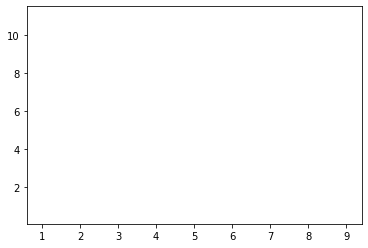

In [102]:
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1])

In [98]:
centroid

array([[7.33333333, 9.        ],
       [1.16666667, 1.46666667]])

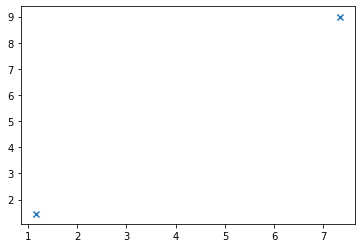

In [103]:
plt.scatter(centroid[:,0], centroid[:,1], marker='x')

In [ ]:
# Hierarchical Clustering
# Agglomerative Clustering -- We dont have specify k value
# Bottom up approach

In [2]:
from sklearn.cluster import AgglomerativeClustering 

In [6]:
X, y = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

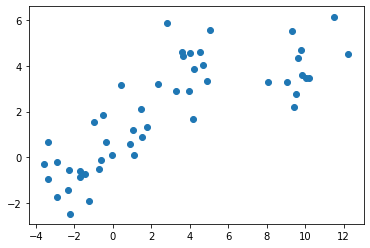

In [7]:
plt.scatter(X[:,0], X[:,1], marker='o')

In [8]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')

In [9]:
agglom.fit(X, y)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

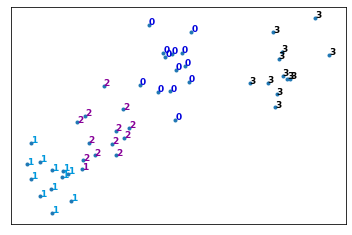

In [11]:
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
# Get the average distance for X1.
X = (X - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X[i, 0], X[i, 1], str(y[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

# Display the plot of the original data before clustering
plt.scatter(X[:, 0], X[:, 1], marker='.')
# Display the plot
plt.show()

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
wine = pd.read_csv('/home/gbhure/Data/Wine.csv')
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,13,2,6,13,125,1,0,0.71,3,8,1,1,1004,1
1,11,6,4,10,147,3,2,0.66,4,2,2,1,681,1
2,11,4,3,13,89,2,4,0.36,2,3,1,3,946,1
3,15,6,6,11,151,4,4,0.54,5,11,1,3,319,1
4,12,2,3,13,146,0,1,0.35,2,7,1,3,1640,1


In [14]:
X = wine.iloc[:,:10].values

In [15]:
import mysql.connector

Text(0, 0.5, 'Euclidean Distance')

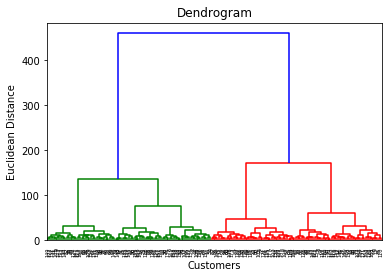

In [17]:
den = dendrogram(linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')